![Image](./resources/header.png)
<h1 align="center">Navigating the Allen Brain Observatory</h1> 
<h3 align="center">TReND CaMinA 2024</h3>

<div style="background: #ADD8E6; border-radius: 3px; padding: 10px;">

This notebook describes the Allen Brain Observatory Visual Coding 2-photon dataset and demonstrates how to access the data using the AllenSDK. We also point you to our JupyterBook that documents this as a reference: https://allenswdb.github.io/physiology/ophys/visual-coding/vc2p-background.html
</div>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Brain Observatory Setup

In [3]:
import os
import platform

# Set file location based on platform. 
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/TReND2024/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/TReND2024/"

manifest_file = os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')

`manifest_file` is a path to the manifest file.  This needs to reflect where you are storing and accessing the data. If you leave this out, a manifest file will be created in your working directory, and data will be downloaded to this location.

In [4]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

#This instantiates the Brain Observatory Cache
boc = BrainObservatoryCache(manifest_file=manifest_file)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 1: Getting oriented to the dataset</h1>

</div>

The Brain Observatory Cache allows us to understand the dimensions of the data in the dataset - the conditions under which each experiment was acquired. It also allows us to access those data, once we select what we want to use.

Let's take a look at the available **imaging depths**, **cre lines**, **areas**, and **stimuli** available in the Brain Observatory 2P dataset.

Start by getting all the areas, which we call "targeted structures"

In [5]:
boc.get_all_targeted_structures()

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']

Use similar functions to get all imaging depths, all cre lines, all reporter lines, all stimuli, and all session types

### Other boc functions
These "get all X" functions return the unique values for key experiment parameters. We can use these parameters to find experiments of interest and use other boc functions to get those data.

### 1.1 Experiment containers & sessions

The <b>experiment container</b> describes a set of 3 imaging sessions performed for the same field of view (ie. same targeted area and imaging depth in the same mouse that targets the same set of neurons). Each experiment container has a unique ID number.

Choose a visual area and Cre line from the lists above

In [8]:
visual_area = 'VISp'
cre_line ='Cux2-CreERT2'

In [9]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area], cre_lines=[cre_line])

<b>get_experiment_containers</b> returns a list of experiment containers that meets the conditions we have specified. If we don't pass any parameters, it returns all experiment containers. 

How many experiment containers are there for the area and Cre line you chose?

Side question: how many experiment containers are there total?

In [12]:
len(boc.get_experiment_containers())

456

Not all areas and Cre lines are sampled equally. Let's make a table of how many experiment tables there are for each Cre line and cortical area combination:

In [ ]:
#get lists of cre lines and of areas using the functions above 
cre_lines = 
areas = 

#create an empty dataframe with colums as areas and index as cre_lines
df = 

#populate the dataframe with the number of experiment containers for each combination


#look at dataframe
df

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Discuss** What area has the most data? What Cre lines have the most/least data? Anything else pop out as interesting?
</div>

Let's look at the list of experiment containers we got for our cre line and area that we chose above. What information do we get in this list? Make a dataframe of this list, to compare the information for each container.

In [11]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area], cre_lines=[cre_line])

In [12]:
pd.DataFrame(exps)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,511510736,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],False
1,511510855,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),229106,Cux2-CreERT2;Camk2a-tTA;Ai93-229106,[],False
2,511509529,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222420,Cux2-CreERT2;Camk2a-tTA;Ai93-222420,[],False
3,511507650,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222424,Cux2-CreERT2;Camk2a-tTA;Ai93-222424,[],False
4,511510699,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),225037,Cux2-CreERT2;Camk2a-tTA;Ai93-225037,[],False
5,702934962,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),382421,Cux2-CreERT2;Camk2a-tTA;Ai93-382421,[],False
6,645413757,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),348262,Cux2-CreERT2;Camk2a-tTA;Ai93-348262,[],False
7,659767480,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),360565,Cux2-CreERT2;Camk2a-tTA;Ai93-360565,[],False
8,511510650,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222425,Cux2-CreERT2;Camk2a-tTA;Ai93-222425,[],False
9,712178509,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),390323,Cux2-CreERT2;Camk2a-tTA;Ai93-390323,[],False


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Let's look at one experiment container, imaged from Cux2, in VISp, from imaging depth 175 um.
</div>

In [15]:
experiment_container_id = 511510736

In [16]:
sessions = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id])

<b>get_ophys_experiments</b> returns a list of <b>imaging sessions</b> for the conditions that we specified (in this case we passed a single experiment container id). If we don't pass any parameters, it returns all imaging sessions. What other keywords can we use to select imaging sessions?

In [10]:
pd.DataFrame(sessions)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,501704220,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),104,511510736,three_session_A,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True
1,501559087,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),103,511510736,three_session_B,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True
2,501474098,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),102,511510736,three_session_C,222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,True


!['Diagram of containers'](http://alleninstitute.github.io/AllenSDK/_static/container_session_layout.png)

Question: how many total sessions are there?

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
Let's get the id for the imaging session for this container that has natural scenes
</div>

In [17]:
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['natural_scenes'])[0]['id']

In [12]:
print(session_id)

501559087


The session_id is the critical link to accessing the data that is contained in the NWB files, as we'll see below. There are other ways that you can identify a session using the `get_ophys_experiments` function. Using the `?` in front of the function will show you the docstring for this function where we can see what other parameters we can use:

In [13]:
? boc.get_ophys_experiments

Signature:
 boc.get_ophys_experiments(
    file_name=None,
    ids=None,
    experiment_container_ids=None,
    targeted_structures=None,
    imaging_depths=None,
    cre_lines=None,
    reporter_lines=None,
    transgenic_lines=None,
    stimuli=None,
    session_types=None,
    cell_specimen_ids=None,
    include_failed=False,
    require_eye_tracking=False,
    simple=True,
)
Docstring:
Get a list of ophys experiments matching certain criteria.

Parameters
----------
file_name: string
    File name to save/read the ophys experiments.  If file_name is None,
    the file_name will be pulled out of the manifest.  If caching
    is disabled, no file will be saved. Default is None.

ids: list
    List of ophys experiment ids.

experiment_container_ids: list
    List of experiment container ids.

targeted_structures: list
    List of structure acronyms.  Must be in the list returned by
    BrainObservatoryCache.get_all_targeted_structures().

imaging_depths: list
    List of imaging depth

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Discuss** What are all these fields?
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 2: Getting data for an experiment</h1>


</div>

So far we've seen the scope of the dataset and the various metadata parameters. Now we want to look at some data!

<b>get_ophys_experiment_data</b> returns the data object giving us access to everything in the NWB file for a <i>single</i> imaging session

In [18]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

Now let's explore everything inside the object

### 2.1 Maximum projection
This is an array of the projection of the full motion corrected movie. It shows all of the cells imaged during the session.

In [19]:
max_projection = data_set.get_max_projection()

In [22]:
max_projection.shape

(512, 512)

(-0.5, 511.5, 511.5, -0.5)

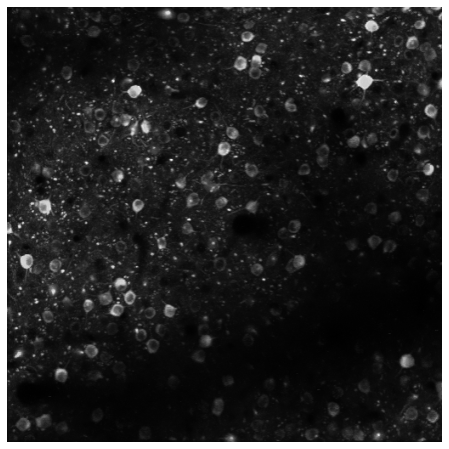

In [20]:
fig = plt.figure(figsize=(8,8))
plt.imshow(max_projection, cmap='gray')
plt.axis('off')

### 2.2 ROI Masks
These are all of the segmented masks for cell bodies in this experiment.

In [21]:
rois = data_set.get_roi_mask_array()

What is the shape of this array? How many neurons are in this experiment?

In [11]:
rois.shape

(174, 512, 512)

In [19]:
print(rois.shape[0])

174


Plot the masks for all the ROIs.

(-0.5, 511.5, 511.5, -0.5)

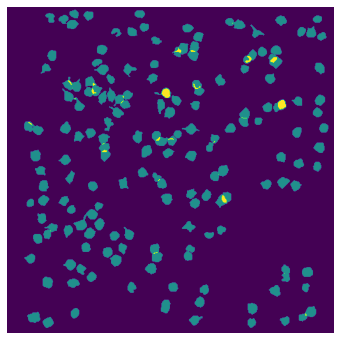

In [22]:
fig = plt.figure(figsize=(6,6))
plt.imshow(rois.sum(axis=0))
plt.axis('off')

Let's look at the mask for one neuron - we can superimpose it on the max projection

(-0.5, 511.5, 511.5, -0.5)

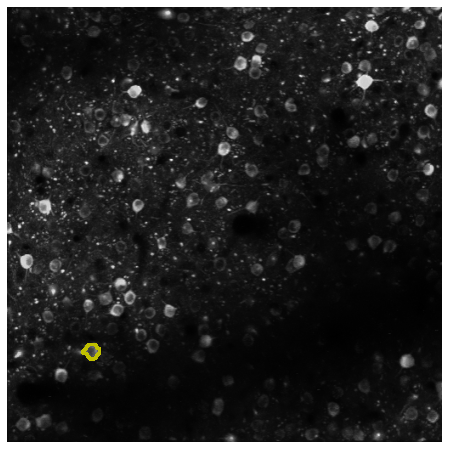

In [30]:
#this is a convenience function for plotting the outline of a roi mask
from allensdk.brain_observatory.observatory_plots import plot_mask_outline

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
ax.imshow(max_projection, cmap='gray')
plot_mask_outline(rois[122,:,:], ax, color='y')
plt.axis('off')

### 2.3 DF/F Traces
There are a number of accessible traces in the NWB file, including raw fluorescence, neuropil corrected traces, demixed traces, and DF/F traces. 

In [37]:
ts,fluor = data_set.get_fluorescence_traces()

In [38]:
fluor.shape

(174, 113888)

In [87]:
_, neuropil = data_set.get_neuropil_traces()

In [40]:
_,cor = data_set.get_corrected_fluorescence_traces()

What are all these traces? One of the important steps in extracting the fluoresence signal from the ROI is called `neuropil correction`. There is some amount of signal in the region of the ROI that derives from the activity of nearby neurons. So when we use the ROI mask to extract the fluorescence of one neuron, there is contamination from those nearby neurons. We correct this by estimating the local neuropil signal. This is done by using a neuropil mask to measure the fluorescence just outside of the ROI, the `neuropil trace`, and then subtracting that neuropil signal, scaled by a `r factor`. This results in the `corrected fluorescence trace`. 

Let's look at these traces for one neuron, zooming in

(1900.0, 2200.0)

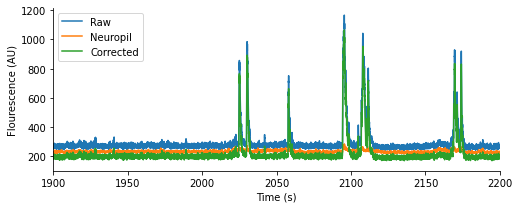

In [88]:
fig = plt.figure(figsize=(8,3))
plt.plot(ts, fluor[122,:], label="Raw")
plt.plot(ts, neuropil[122,:], label="Neuropil")
plt.plot(ts, cor[122,:], label="Corrected")
plt.legend()
sns.despine()
plt.xlabel("Time (s)")
plt.ylabel("Flourescence (AU)")
plt.xlim(1900,2200)

Now let's calculate the correct trace for ourselves. We already have the relevant traces, and we can also get the r values. These were calculated for each neuron independently, so we have one r value for each neuron.

In [50]:
neuropil_r = data_set.get_neuropil_r()

In [51]:
neuropil_r

array([0.078, 0.125, 0.188, 0.165, 0.187, 0.316, 0.172, 0.273, 0.159,
       0.4  , 0.197, 0.302, 0.342, 0.172, 0.173, 0.202, 0.138, 0.   ,
       0.403, 0.212, 0.087, 0.15 , 0.17 , 0.25 , 0.228, 0.219, 0.261,
       0.257, 0.214, 0.225, 0.248, 0.233, 0.22 , 0.211, 0.383, 0.3  ,
       0.214, 0.173, 0.191, 0.175, 0.193, 0.163, 0.144, 0.196, 0.266,
       0.214, 0.229, 0.157, 0.207, 0.295, 0.245, 0.157, 0.218, 0.053,
       0.242, 0.01 , 0.15 , 0.193, 0.219, 0.216, 0.325, 0.256, 0.291,
       0.275, 0.253, 0.266, 0.168, 0.191, 0.151, 0.242, 0.322, 0.34 ,
       0.259, 0.147, 0.249, 0.207, 0.155, 0.229, 0.149, 0.206, 0.339,
       0.207, 0.132, 0.085, 0.172, 0.197, 0.286, 0.173, 0.336, 0.146,
       0.105, 0.2  , 0.27 , 0.179, 0.308, 0.282, 0.248, 0.353, 0.277,
       0.337, 0.25 , 0.28 , 0.285, 0.276, 0.132, 0.179, 0.226, 0.27 ,
       0.258, 0.141, 0.181, 0.145, 0.228, 0.265, 0.293, 0.217, 0.256,
       0.445, 0.268, 0.248, 0.333, 0.355, 0.262, 0.194, 0.252, 0.693,
       0.234, 0.26 ,

In [90]:
corrected_trace = fluor[122,:] - (neuropil_r[122]*neuropil[122,:])

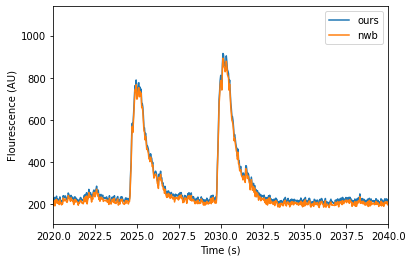

In [57]:
plt.plot(ts, corrected_trace, label="ours")
plt.plot(ts, cor[122,:], label="nwb")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Flourescence (AU)")
plt.xlim(2020,2040);

These traces are important for understanding how we process the data. But th most relevant traces for us are the `DFF traces`. The value of the raw or correct fluorescence are determined by a lot of factors, including the size of the neuron and the optical path. We want to normalize these signals and look at the changes in fluoresence that reflect spiking activity. To do this we calculate the change in fluorescence normalized by the baseline fluorescence. This is called "Delta F over F" or DFF.

One of the big questions here is how do we define the baseline fluorescence. There is no single right answer. The method we used was to use a median filter with a width of 180 seconds (5401 time points) centered on each time point. (There's a little more to it, but this is the general idea).

Let's get the DFF traces

In [82]:
ts, dff = data_set.get_dff_traces()

In [33]:
dff.shape

(174, 113888)

Text(0, 0.5, 'DFF (%)')

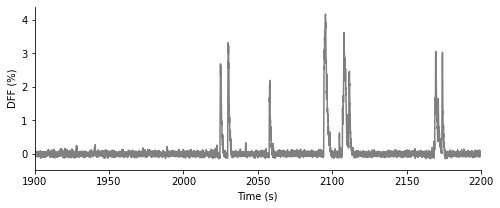

In [31]:
fig = plt.figure(figsize=(8,3))
plt.plot(ts, dff[122,:], color='gray')
sns.despine()
plt.xlabel("Time (s)")
plt.xlim(1900,2200)
plt.ylabel("DFF (%)")

Let's look at the DFF for the first neuron for the entire session

Text(0, 0.5, 'DFF (%)')

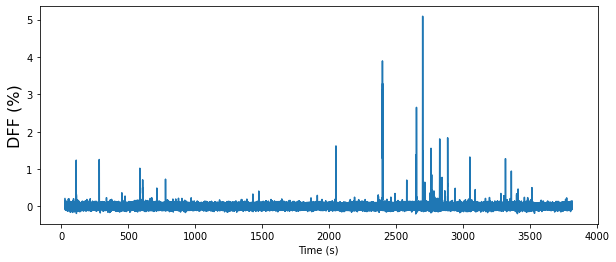

In [30]:
plt.figure(figsize=(10,4))

plt.plot(ts, dff[0,:])

plt.xlabel("Time (s)")
plt.ylabel("DFF (%)", fontsize=16)

Let's look at the first 50 neurons. We're going to plot the DFF for each neuron, and offset each neuron.

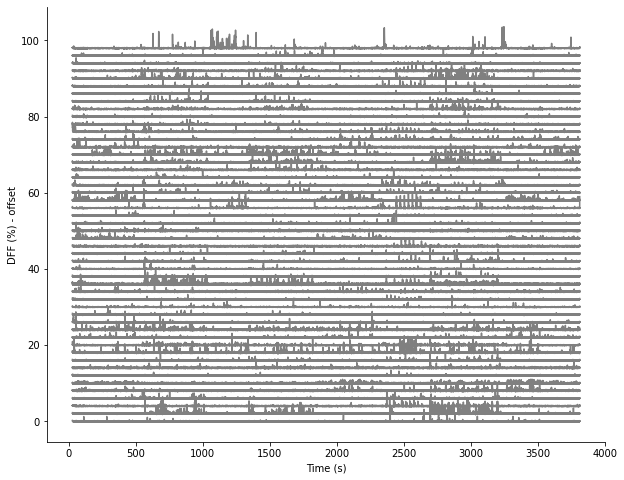

In [32]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(ts, dff[i,:]+(i*2), color='gray')
plt.xlabel("Time (s)")
plt.ylabel("DFF (%) - offset")
sns.despine()

It looks like different neurons are active at different times. Why might that be?

### 2.4 Stimulus epochs

Several stimuli are shown during each imaging session, interleaved with each other. The `stimulus epoch table` provides information of the "stimulus epochs" which are intervals of 5-20 minutes of a particular stimulus type (e.g. 5 minutes of natural movies or 10 minutes of drifting gratings). Within these epochs, there are many trials, and these are documented in the `stimulus table` (see section 2.6 below).


Get the stimulus epoch table for this session from data_set and print the table

In [35]:
stim_epoch = data_set.get_stimulus_epoch_table()

In [36]:
stim_epoch

,stimulus,start,end
0,static_gratings,747,15196
1,natural_scenes,16100,30551
2,spontaneous,30701,39581
3,natural_scenes,39582,54050
4,static_gratings,54953,69403
5,natural_movie_one,70307,79338
6,natural_scenes,80241,96126
7,static_gratings,97406,113662


What are these start and end values? These are the timepoints when each spoch starts and ends. These are provided in the units of 2p acquisition frames. So far we've been looking at the DFF traces relative to the timestamps (ts). These timestamps were calculated from the acquisition frame number and the imaging rate. But the imaging frame number is often a more useful way to index these traces. All the signals we look at - including the fluorescence traces as well as running speed and eye position traces - are aligned to these acqusition frames. 

Let's overlay stimulus epochs onto our plot of the DFF traces. We're going to drop the timestamps and just use acquisition frames here.

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">

We're going to use a useful python function called `enumerate` which returns both the index and value of items in a list. We'll make a list of the stimulus types and enumrate them

<div style="background: #F0FAFF; border-radius: 3px; padding: 10px;">

We'll also use a matplotlib function called `plt.axvspan` which allows us to shaed regions of the plot. This plots a rectangle that spans from xmin to xmax horizontally, and, by default, the whole y-axis vertically. (`axhspan` does the equivalent for the y axis.) You can use the `?` to find out more information about this function.

Let's put this together to add some shading to our plot to indicate each stimulus epoch during the session.

Text(0.5, 0, 'Acquisition frames')

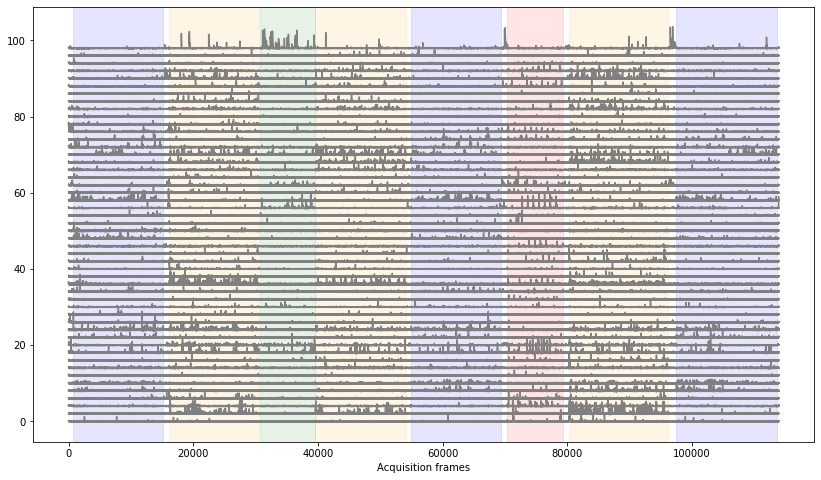

In [49]:
fig = plt.figure(figsize=(14,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)
        
plt.xlabel("Acquisition frames")

### 2.5 Running speed

The running speed of the animal on the rotating disk during the entire session.

In [45]:
dxcm, tsd = data_set.get_running_speed()

In [46]:
dxcm.shape

(113888,)

Notice that this has the same length as the dff traces. This running speed has also been temporally aligned with the other data.

Plot the running speed. Label the units (they are cm/s)

Text(0.5, 0, 'Aquisition frames')

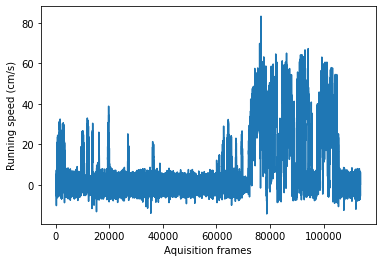

In [48]:
plt.plot(dxcm)
plt.ylabel("Running speed (cm/s)")
plt.xlabel("Aquisition frames")

Add the running speed to the neural activity and stimulus epoch figure

Text(0.5, 0, 'Aquisition frames')

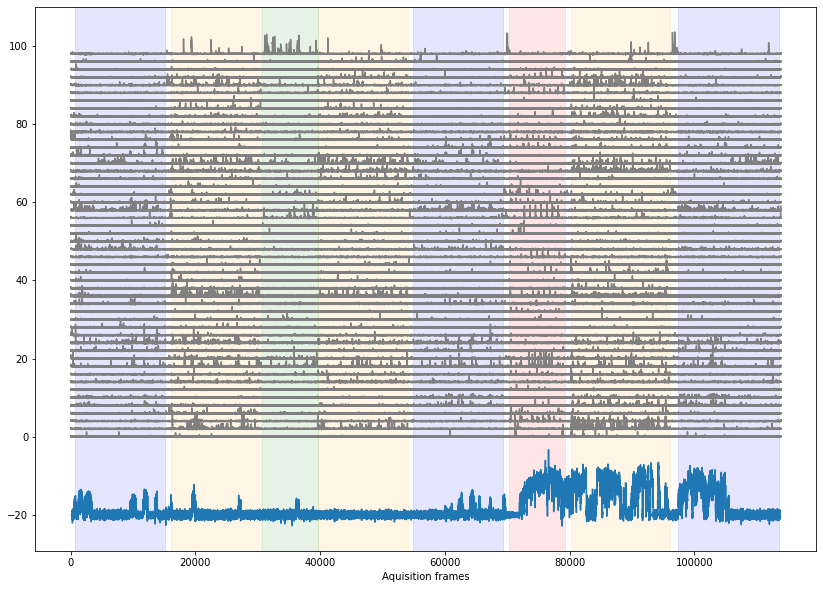

In [50]:
fig = plt.figure(figsize=(14,10))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#Add the running speed - we'll offset this below the traces
plt.plot((0.2*dxcm)-20)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)
        
plt.xlabel("Aquisition frames")

### Interesting things

There are some interesting neurons here.  Plot the dff trace for neuron 49 with the stimulus epochs, and running trace. Do you notice anything about when the neuron is active?

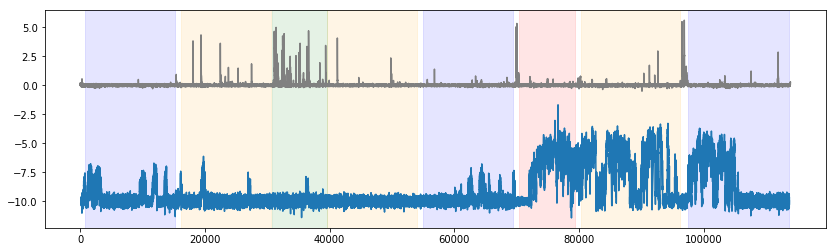

In [36]:
fig = plt.figure(figsize=(14,4))

plt.plot(dff[49,:], color='gray')
plt.plot((0.1*dxcm)-10)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise:** Make the same plot for neuron number 4 and then for neuron 35.  What do you notice about their activity?</div>


Already we can see that there is diversity in the activity of these neurons, even on just a very coarse level!

### 2.5b Extracted events
We have done "event extraction" on the DFF traces to estimate the firing events of the neurons a bit more precisely. We use a method developed by Sean Jewell and Daniella Witten called the L0 method. These events are not "spikes" but rather spiking events, and their amplitude is correlated with the neuron's firing rate.

These are not stored in the same NWB file, thus the way to access it is via the `boc` rather than through the data_set object.

In [51]:
events = boc.get_ophys_experiment_events(ophys_experiment_id=session_id)

In [52]:
events.shape

(174, 113888)

Notice that this array has the same shape as the array for DFF. What are these dimensions?

Let's plot the events and the dff trace for one neuron (say neuron 1) and zoom in a bit to see what's going on.

(20000.0, 21000.0)

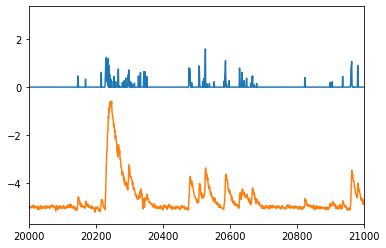

In [55]:
plt.plot(2*events[1,:])
plt.plot(dff[1,:]-5)
plt.xlim(20000,21000)

Text(0, 0.5, 'DFF')

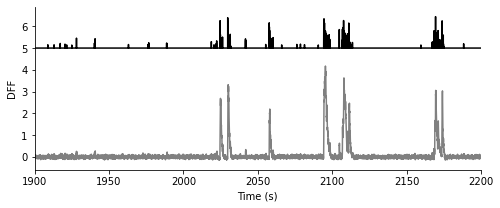

In [54]:
fig = plt.figure(figsize=(8,3))
plt.plot(ts, dff[122,:], color='gray')
plt.plot(ts, 2*events[122,:]+5, color='black')
sns.despine()
plt.xlabel("Time (s)")
plt.xlim(1900,2200)
plt.ylabel("DFF")

Remake our plot of neural activty, stimulus, and running using events

### 2.6 Stimulus Table
We saw the spimulus epoch table above in section 2.4. For each stimulus type there is a stimulus table with information about the condition and timing of each trial. We can access this using `get_stimulus_table`.

In [99]:
natural_scene_table = data_set.get_stimulus_table('natural_scenes')

Let's look at this table. What are the columns? What are the rows?

In [65]:
natural_scene_table.head()

,frame,start,end
0,81,16100,16107
1,33,16108,16115
2,76,16115,16122
3,13,16123,16130
4,56,16130,16137


The column called `frame` indicates which image was shown by references the "stimulus template" (see section 2.7 below). 

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise:** How many different images were shown? How many times were they each shown?</div>

In [ ]:
#Hint: use `unique` to find unique values of frame

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Discuss:** One of the values we see is -1. What do you think this mean? </div>


<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise:** What is the duration of each trial? Is there any inter-trial interval (i.e. time between trials)</div>

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise:** Get the stimulus table for `static gratings`. Print the top of this dataframe. This looks a little different from the last one, why is that? What are the parameters for this stimulus?</div>

<div style="background: #FFF0F0; border-radius: 3px; padding: 10px;">
<p>**Exercise:** How many unique orientations and spatial_frequencies and phases were used? How many combinations are there? What are the NaN conditions? How many trials of each combination?</div>

### 2.7 Stimulus Template

The images and movies presented during the session are also included in the NWB file as the `stimulus template`. Stimuli that are generated programmatically (eg. drifting and static gratings) do not have a stimulus template. There are tools in the SDK to recreate these stimuli.

In [21]:
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

In [22]:
natural_scene_template.shape

(118, 918, 1174)

What is the first dimension of this array?

Plot some of these images to see what they are

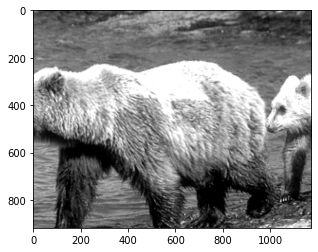

In [23]:
scene_number = 0
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')

Look at the scene presented for the first trial

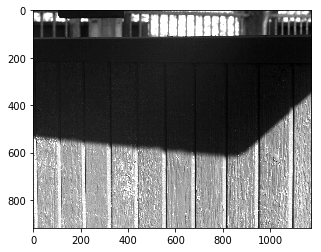

In [58]:
scene_number = natural_scene_table.frame.loc[0]
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')

Plot the time when this image is presented overlayed on the activity the 50 neurons

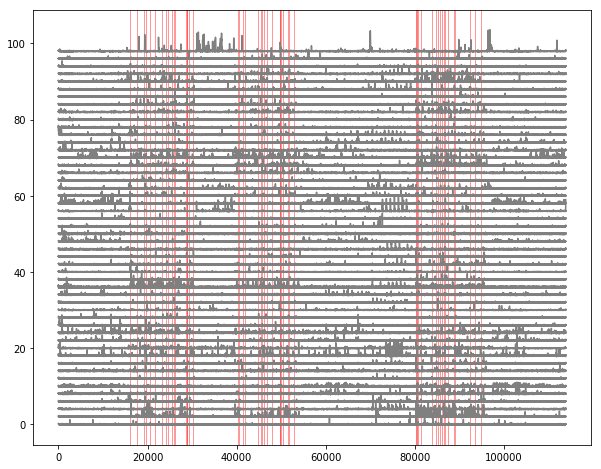

In [59]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#shade traces with the time of each presentation of the above scene
stim_subset = natural_scene_table[natural_scene_table.frame==scene_number]
for j in range(len(stim_subset)):
    plt.axvspan(xmin=stim_subset.start.iloc[j], xmax=stim_subset.end.iloc[j], color='red', alpha=0.4)

### 2.8 Metadata
This includes metadata about the experiment, some of which we used to select this experiment, some of which is only included here.

In [60]:
data_set.get_metadata()

{'sex': 'male',
 'targeted_structure': 'VISp',
 'ophys_experiment_id': 501559087,
 'experiment_container_id': 511510736,
 'excitation_lambda': '910 nanometers',
 'indicator': 'GCaMP6f',
 'fov': '400x400 microns (512 x 512 pixels)',
 'genotype': 'Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)',
 'session_start_time': datetime.datetime(2016, 2, 4, 10, 25, 24),
 'session_type': 'three_session_B',
 'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
 'cre_line': 'Cux2-CreERT2/wt',
 'imaging_depth_um': 175,
 'age_days': 104,
 'device': 'Nikon A1R-MP multiphoton microscope',
 'device_name': 'CAM2P.2',
 'pipeline_version': '3.0'}

Metadata includes: age, sex, device & device_name, genotype, etc.

# 2.9 Cell ids and indices

Each neuron in the dataset has a unique id, called the `cell specimen id`. To find the neurons in this session, get the cell specimen ids. This id can be used to find experiments/session - as we'll do later today.

Within an experiment container, the same field of view is imaged across three different sessions on three different days. Many neurons were matched across these three sessions (either two of the three session, or all three). The same cell specimen id is used for the neuron across all sessions that it is was identified in - so this is valuable for comparing the activity of a neuron across multiple sessions. 

In [61]:
cell_ids = data_set.get_cell_specimen_ids()

In [62]:
cell_ids

array([517473350, 517473341, 517473313, 517473255, 517471959, 517471769,
       517473059, 517471997, 517472716, 517471919, 517472989, 517472293,
       517473115, 517472454, 517473020, 517472734, 517474366, 587377483,
       517471708, 587377366, 587377223, 517474444, 517474437, 517473105,
       517472300, 517472326, 517472708, 517472215, 517472712, 517472360,
       517472399, 517472197, 517472582, 517472190, 517473926, 587377518,
       517471931, 517472637, 517472416, 517471658, 517472724, 517472684,
       517471664, 587377211, 517473947, 587377064, 517472063, 587377621,
       517473080, 517472553, 517473001, 517474078, 517471794, 517471674,
       517473916, 517471803, 517472592, 517473014, 517474459, 517472241,
       517472720, 517472534, 517472054, 587377662, 517474012, 517474020,
       517473653, 517472007, 517472645, 517472211, 517472677, 517472731,
       517472621, 517472442, 587377204, 517473027, 517472818, 517473304,
       517474121, 517473034, 517472909, 517473624, 

Within each individual session, a cell specimen id is associated with an `cell specimen index`. This index maps into the dff of event traces.  Pick one cell id from the list above and find the index for that cell. Look for the cell specimen indices.

In [101]:
data_set.get_cell_specimen_indices([517473110])

[110]

# 2.10 Cell Specimen Table

For every neuron in the entire observatory dataset, there are precomputed metrics for the different stimuli. These metrics can be useful for identifying neurons you want to use for further analysis. There are some caveats with these metrics, so I recommend you ask us questions about what they are before you use them. A whitepaper called "Stimulus Set and Response Analysis" can be downloaded from this site: https://community.brain-map.org/t/documentation-brain-observatory/3026 - this documents these metrics in more detail

In [21]:
cell_specimens = pd.DataFrame(boc.get_cell_specimens())

In [23]:
cell_specimens.shape

(61371, 60)

In [22]:
cell_specimens.head()

,p_run_mod_sg,tlr1_id,image_sel_ns,tlr1_name,g_dsi_dg,p_ns,specimen_id,p_dg,time_to_peak_sg,pref_dir_dg,...,peak_dff_ns,reliability_nm2,all_stim,run_mod_sg,pref_sf_sg,sfdi_sg,g_osi_sg,g_osi_dg,reliability_nm3,donor_full_genotype
0,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),NaN,NaN,502185555,NaN,NaN,NaN,...,NaN,0.099343,False,NaN,NaN,NaN,NaN,NaN,NaN,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...
1,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),0.824858,NaN,502185555,2.690800e-15,NaN,0.0,...,NaN,NaN,False,NaN,NaN,NaN,NaN,0.901542,0.026367,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...
2,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),0.812462,NaN,502185555,3.070093e-02,NaN,180.0,...,NaN,0.030118,False,NaN,NaN,NaN,NaN,0.894923,0.040158,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...
3,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),0.078742,NaN,502185555,1.245296e-01,NaN,NaN,...,NaN,0.041259,False,NaN,NaN,NaN,NaN,0.109241,0.022241,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...
4,NaN,265943423,NaN,Ai93(TITL-GCaMP6f),NaN,NaN,502185555,NaN,NaN,NaN,...,NaN,0.026227,False,NaN,NaN,NaN,NaN,NaN,NaN,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...


In [66]:
cell_specimens.keys()

Index(['all_stim', 'area', 'cell_specimen_id', 'donor_full_genotype', 'dsi_dg',
       'experiment_container_id', 'failed_experiment_container', 'g_dsi_dg',
       'g_osi_dg', 'g_osi_sg', 'image_sel_ns', 'imaging_depth', 'osi_dg',
       'osi_sg', 'p_dg', 'p_ns', 'p_run_mod_dg', 'p_run_mod_ns',
       'p_run_mod_sg', 'p_sg', 'peak_dff_dg', 'peak_dff_ns', 'peak_dff_sg',
       'pref_dir_dg', 'pref_image_ns', 'pref_ori_sg', 'pref_phase_sg',
       'pref_sf_sg', 'pref_tf_dg', 'reliability_dg', 'reliability_nm1_a',
       'reliability_nm1_b', 'reliability_nm1_c', 'reliability_nm2',
       'reliability_nm3', 'reliability_ns', 'reliability_sg',
       'rf_area_off_lsn', 'rf_area_on_lsn', 'rf_center_off_x_lsn',
       'rf_center_off_y_lsn', 'rf_center_on_x_lsn', 'rf_center_on_y_lsn',
       'rf_chi2_lsn', 'rf_distance_lsn', 'rf_overlap_index_lsn', 'run_mod_dg',
       'run_mod_ns', 'run_mod_sg', 'sfdi_sg', 'specimen_id', 'tfdi_dg',
       'time_to_peak_ns', 'time_to_peak_sg', 'tld1_id', 'tld1

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> 3. (BONUS!) Accessing calcium movies.</h2>

If you are accessing the data on AWS, you can find the files for the calcium movies (the motion corrected calcium movies). These can be valuable if you are interested in questions around image processing for extracting signals from these movies. Here is an example piece of code that shows the beginning of the experiment we've been looking at.

</div>

In [8]:
import h5py
from matplotlib import animation, rc
from IPython.display import HTML

In [9]:
raw_data_dir = '/data/allen-brain-observatory/visual-coding-2p/ophys_movies/'

In [14]:
def get_raw_data_path(session_id):
    return os.path.join(raw_data_dir, 'ophys_experiment_'+str(session_id)+'.h5')

exp_path = get_raw_data_path(session_id)

In [15]:
raw_data = h5py.File(exp_path, 'r')
raw_data['data']

<HDF5 dataset "data": shape (113888, 512, 512), type "<u2">

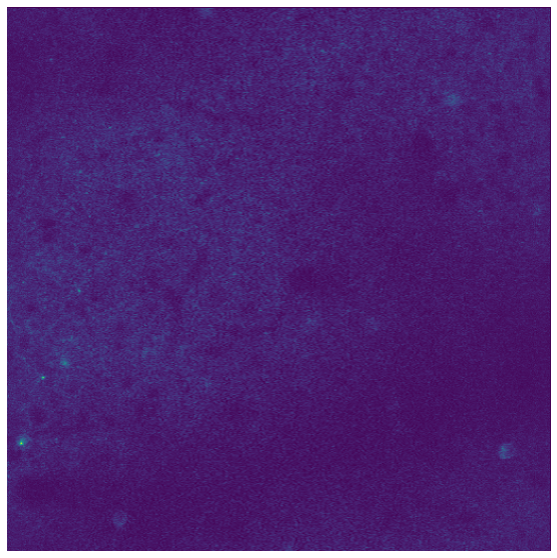

In [17]:
fig, ax = plt.subplots(figsize=(5,5))

im = ax.imshow(raw_data['data'][0])
ax.axis('off')

def init():
    im.set_data(raw_data['data'][0])
    return (im,)

def animate(i):
    im.set_data(raw_data['data'][i])
    return (im,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=30, interval=1000./30, blit=True)

In [ ]:
from IPython.display import HTML
HTML(anim.to_jshtml())